In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

## Part 1: Prepare the Data

In [2]:
filepath='myopia.csv'

In [3]:
df = pd.read_csv(filepath)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
#Remove the "MYOPIC" column from the dataset
#used this as reference https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.drop.html
labels = df['MYOPIC']
df = df.drop('MYOPIC', axis=1)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [5]:
#Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values
from sklearn.preprocessing import StandardScaler
#refe
scale = StandardScaler()
scale_data = scale.fit_transform(df)

## Part 2: Apply Dimensionality Reduction


In [6]:
#Perform dimensionality reduction with PCA.
from sklearn.decomposition import PCA
#used this webpage to help me understand this fully https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#preserve 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=.9)

pca_data= pca.fit_transform(scale_data)

pca.explained_variance_ratio_.sum()

0.9187361702915187

In [7]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results
from sklearn.manifold import TSNE

tsne = TSNE()

tsne_pca_output = tsne.fit_transform(pca_data)

/Users/joemazanec/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/joemazanec/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


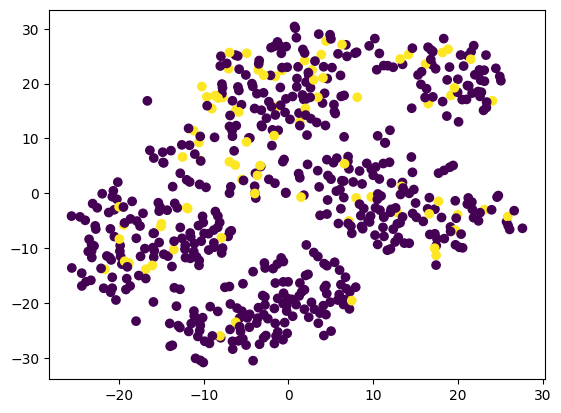

In [8]:
#Create a scatter plot of the t-SNE output
plt.scatter(tsne_pca_output[:,0],tsne_pca_output[:,1],c=labels)

## Part 3: Perform a Cluster Analysis with K-means

In [9]:
#Create an elbow plot to identify the best number of clusters
from sklearn.cluster import KMeans

inertia=[]

for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(pca_data)
    inertia.append(km.inertia_)

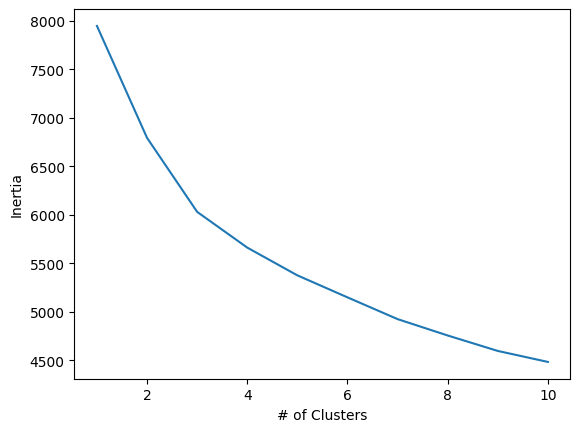

In [10]:
#plot the elbow curve
plt.plot(range(1,11), inertia)
plt.xlabel("# of Clusters");
plt.ylabel("Inertia");

## Part 4: Make a Recommendation

My recommendation is that the patients should not be clustered after all the scaling and fitting of the data. The initial reaction would be to have the clusters be around 3, but when viewing the scatter and elbow chart, it is more obvious that this data cannot be clustered. 